# Altair theme for Reveal data graphics

- You will need 'Tenon' installed as a system-wide font.
- There will likely be more style modifications needed after exporting as SVG to Adobe Illustrator.
- There's some bottom padding added to the bottom of each chart to add in Sources and Credits manually.
- Check the examples below for customizing charts.

In [1]:
import pandas as pd
from vega_datasets import data

## Import Altair and register theme

In [2]:
import altair as alt
import altair_reveal as altair_reveal
alt.themes.register('altair_reveal', altair_reveal.theme)
alt.themes.enable('altair_reveal')

ThemeRegistry.enable('altair_reveal')

### Fallback to png for GitHub display

In [3]:
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

### Save charts (you'll need chromedriver)

In [4]:
from altair_saver import save

## Pre-defined colors

In [5]:
altair_reveal.palette

{'black': '#222222',
 'white': '#ffffff',
 'background': '#f9f9f9',
 'light_grey': '#dddddd',
 'dark_grey': '#666666',
 'orange': '#e54600',
 'dark_blue': '#004488',
 'blue': '#0077bb',
 'magenta': '#c51b8a'}

## Clean the data

In [6]:
cars = data.cars().copy()
cars['Year'] = pd.to_datetime(cars['Year'])
cars = cars[cars['Year'] <= '1980-12-31'].copy()

## Horizontal bar chart

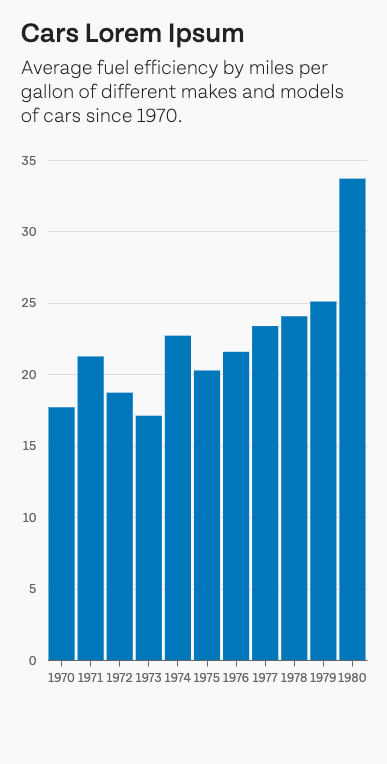

In [7]:
hbar = alt.Chart(cars).mark_bar().encode(
    x=alt.X('year(Year):O'), # wrap `Year` column with Altair's year() fn, then type as :O[rdinal] for proper display
    y=alt.Y('mean(Miles_per_Gallon)', axis=alt.Axis(tickCount=10)),
).properties(
    title={
        'text': 'Cars Lorem Ipsum',
        'subtitle' : ['Average fuel efficiency by miles per', 'gallon of different makes and models', 'of cars since 1970.', ' ']

        # You could split up the subtitle into separate strings to fit 
        # each line, as shown above. However, it's better for Reveal's 
        # workflow to make the subtitle longer than what will fit in 
        # the chart because you can edit it in Illustrator, like so:
        
        # 'subtitle' : ['Average fuel efficiency by miles per gallon of different makes and models of cars since 1970.', ' ']
    }
)
hbar

In [8]:
# uncomment to save image as svg
# save(hbar, 'hbar.svg')

## Vertical bar chart

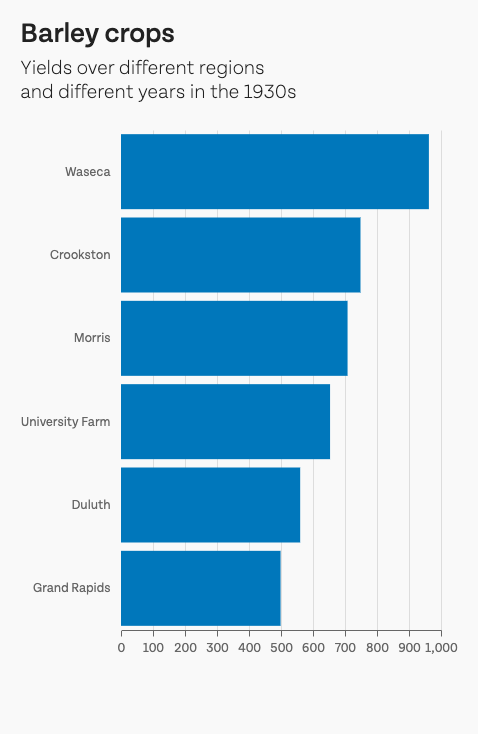

In [9]:
alt.Chart(data.barley()).mark_bar().encode(
    x=alt.X(
        'sum(yield):Q',
        axis=alt.Axis(tickCount=10)
    ),
    y=alt.Y('site:N', sort='-x')
).properties(
    title={
        'text': 'Barley crops',
        'subtitle' : ['Yields over different regions', 'and different years in the 1930s', ' ']
    }
) 

## Line chart

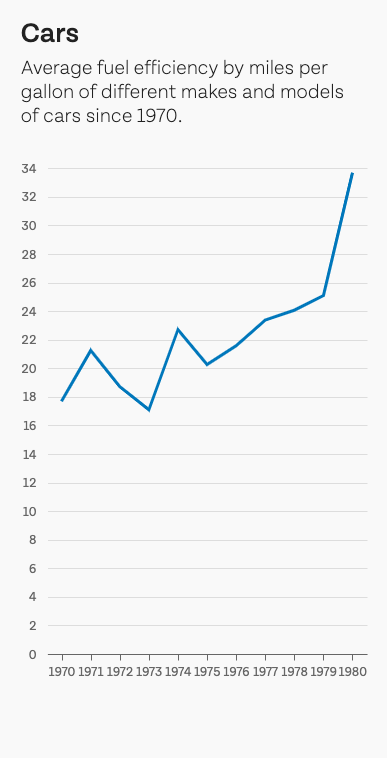

In [10]:
alt.Chart(cars).mark_line().encode(
    x=alt.X('year(Year):O'), # wrap `Year` column with Altair's year() fn, then type as :O[rdinal] for proper display
    y=alt.Y('mean(Miles_per_Gallon)'),
).properties(
    title={
        'text': 'Cars',
        'subtitle' : ['Average fuel efficiency by miles per', 'gallon of different makes and models', 'of cars since 1970.', ' ']
    }
)

## Scatterplot

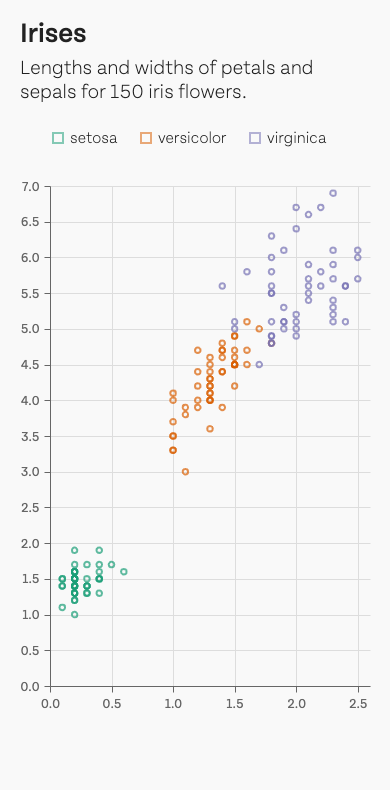

In [11]:
alt.Chart(data.iris()).mark_point().encode(
    x='petalWidth',
    y='petalLength',
    color=alt.Color('species', scale=alt.Scale(scheme='dark2'))
    
    # add a title to the legend if needed
    # color=alt.Color('species', scale=alt.Scale(scheme='dark2'), title='Species')
    # Key squares are oddly outlined in Altair but should be filled in Illustrator
).configure_axisY( # adding some colors back to the scatterplot
    domainColor='#666666',
    tickColor='#666666',
).properties(
    title={
        'text': 'Irises',
        'subtitle' : ['Lengths and widths of petals and','sepals for 150 iris flowers.',' ']
    }
)

## Step chart

The chart below might need some modifications with the tick marks in production.

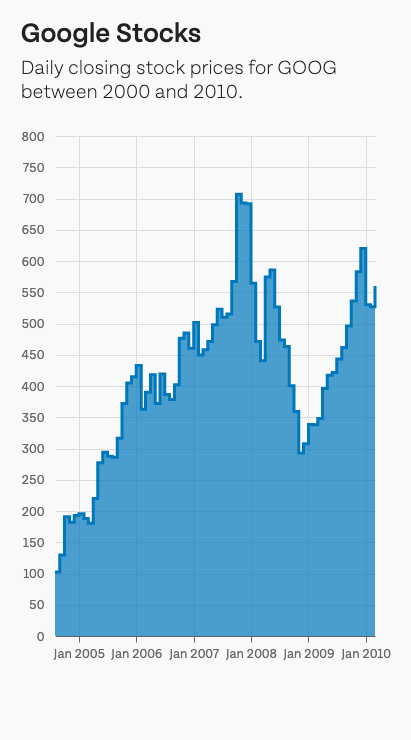

In [13]:
alt.Chart(data.stocks()).mark_area(
        interpolate='step-after',
        line=True
    ).encode(
        x=alt.X('yearmonth(date):T'),
        y='price'
    ).transform_filter(
        alt.datum.symbol == 'GOOG'
    ).properties(
        title={
            'text': 'Google Stocks',
            'subtitle' : ['Daily closing stock prices for GOOG','between 2000 and 2010.',' ']
        }
    )

## Heatmap

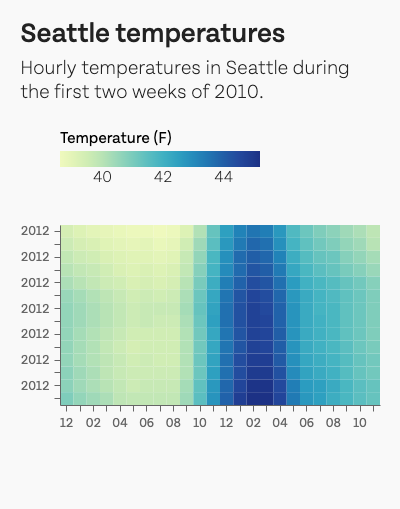

In [19]:
temps = data.seattle_temps()
temps = temps[temps.date < '2010-01-15'].copy()
alt.Chart(temps).mark_rect(
).encode(
    alt.X('hoursminutes(date):O'),
    alt.Y('monthdate(date):O', axis=alt.Axis(format='%Y')), # format follows d3-time-format 
    alt.Color('temp:Q', title='Temperature (F)')
).configure_axisY( # adding some colors for clarity
    domainColor='#666666',
    tickColor='#666666',
).properties(
    height=180, # adjust height to get neat squares
    title={
        'text': 'Seattle temperatures',
        'subtitle' : ['Hourly temperatures in Seattle during','the first two weeks of 2010.',' ']
    }
)

## Small multiple

In [15]:
disasters = data.disasters()
disasters = disasters[
    (disasters['Year'] >= 2010) & 
    (disasters['Entity'] != 'All natural disasters')
].reset_index(drop=True)

# Pivot and melt the data so that we can generate rows for 0 deaths.
# Makes the following chart more uniform when using `resolve_scale`.
disasters_pivot = disasters.pivot_table(index='Entity', columns='Year', values='Deaths').reset_index()
disasters_pivot = disasters_pivot.fillna(0)
disasters_melt = pd.melt(disasters_pivot, id_vars='Entity', value_vars=[2010, 2011, 2012, 2012, 2014, 2015, 2016, 2017], value_name='Deaths')
disasters_melt

,Entity,Year,Deaths
0,Drought,2010,20000.0
1,Earthquake,2010,226733.0
2,Epidemic,2010,12143.0
3,Extreme temperature,2010,57188.0
4,Extreme weather,2010,1564.0
...,...,...,...
65,Flood,2017,648.0
66,Landslide,2017,405.0
67,Mass movement (dry),2017,0.0
68,Volcanic activity,2017,0.0


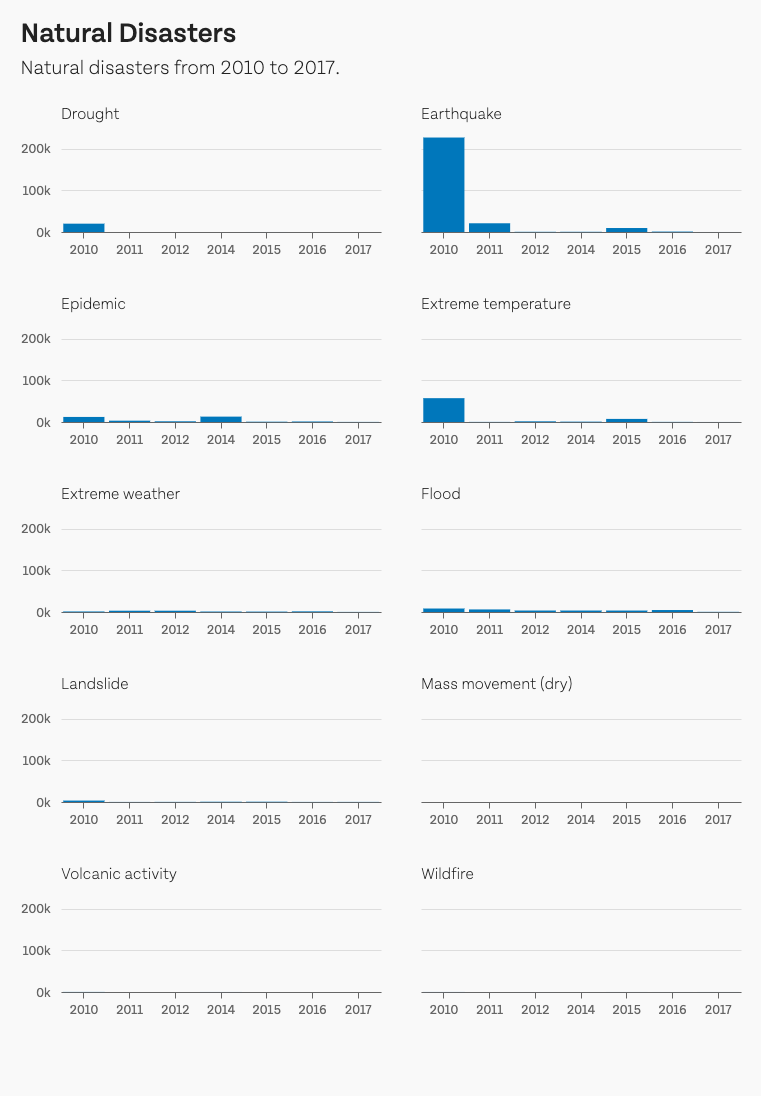

In [16]:
alt.Chart(disasters_melt).mark_bar().encode(
    x=alt.X('Year:O', axis=alt.Axis(labelAngle=0)), # labelAngle is rotated because `Year` is int not actual datetime object
    y=alt.Y('Deaths:Q', axis=alt.Axis(format='s')) # format follows d3-format: turns 100,000 to 100k.  
).properties(
    height=100 # height here deals with the height of each facet chart
).facet(
    facet=alt.Facet('Entity', 
        title=None,
        header=alt.Header(
            labelAnchor='start',
            labelFont='Tenon',
            labelFontSize=16,
            labelFontWeight=300,
            labelColor=altair_reveal.palette['black']
        )
    ),
    columns=2, # columns=1 for mobile view
    spacing=40,
    title={
        'text': 'Natural Disasters',
        'subtitle' : ['Natural disasters from 2010 to 2017.', ' ']
    }
).resolve_scale(
    x='independent'
)